In [1]:
import pandas as pd
import numpy as np


In [33]:
import os
os.getcwd()

'/Users/apple/Downloads/Deep Learning/Feature-Engineering-Live-sessions-master'

In [2]:
df=pd.read_csv('mobile_dataset.csv')

In [3]:
#univariate selection
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [6]:
from sklearn.feature_selection import SelectKBest, chi2

In [7]:
#apply select kbest
ordered_rank_feature=SelectKBest(score_func=chi2,k=20)
ordered_rank_=ordered_rank_feature.fit(X,Y)
ordered_rank_.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [11]:
df_score=pd.DataFrame(ordered_rank_.scores_,columns=['score'])
df_col=pd.DataFrame(X.columns)
features_rank=pd.concat([df_col,df_score],axis=1)
features_rank.columns=['feature','score']

In [12]:
features_rank.head()

,feature,score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166


Feature importance
The higher the score the more its importance

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [16]:
print(model.feature_importances_)

[0.06128736 0.01976588 0.03369909 0.01952331 0.03168059 0.01725534
 0.03555045 0.03305219 0.03700307 0.03324995 0.03223756 0.04576094
 0.04880144 0.39690584 0.0340465  0.03341166 0.03444097 0.013854
 0.01800836 0.02046552]


<AxesSubplot:>

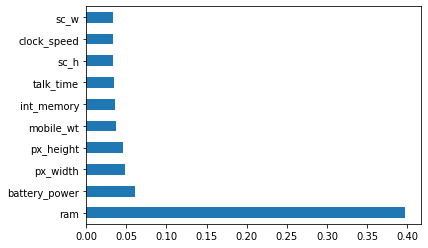

In [19]:
ranked_feature=pd.Series(model.feature_importances_,index=X.columns)
ranked_feature.nlargest(10).plot(kind='barh')

#Correlation

<AxesSubplot:>

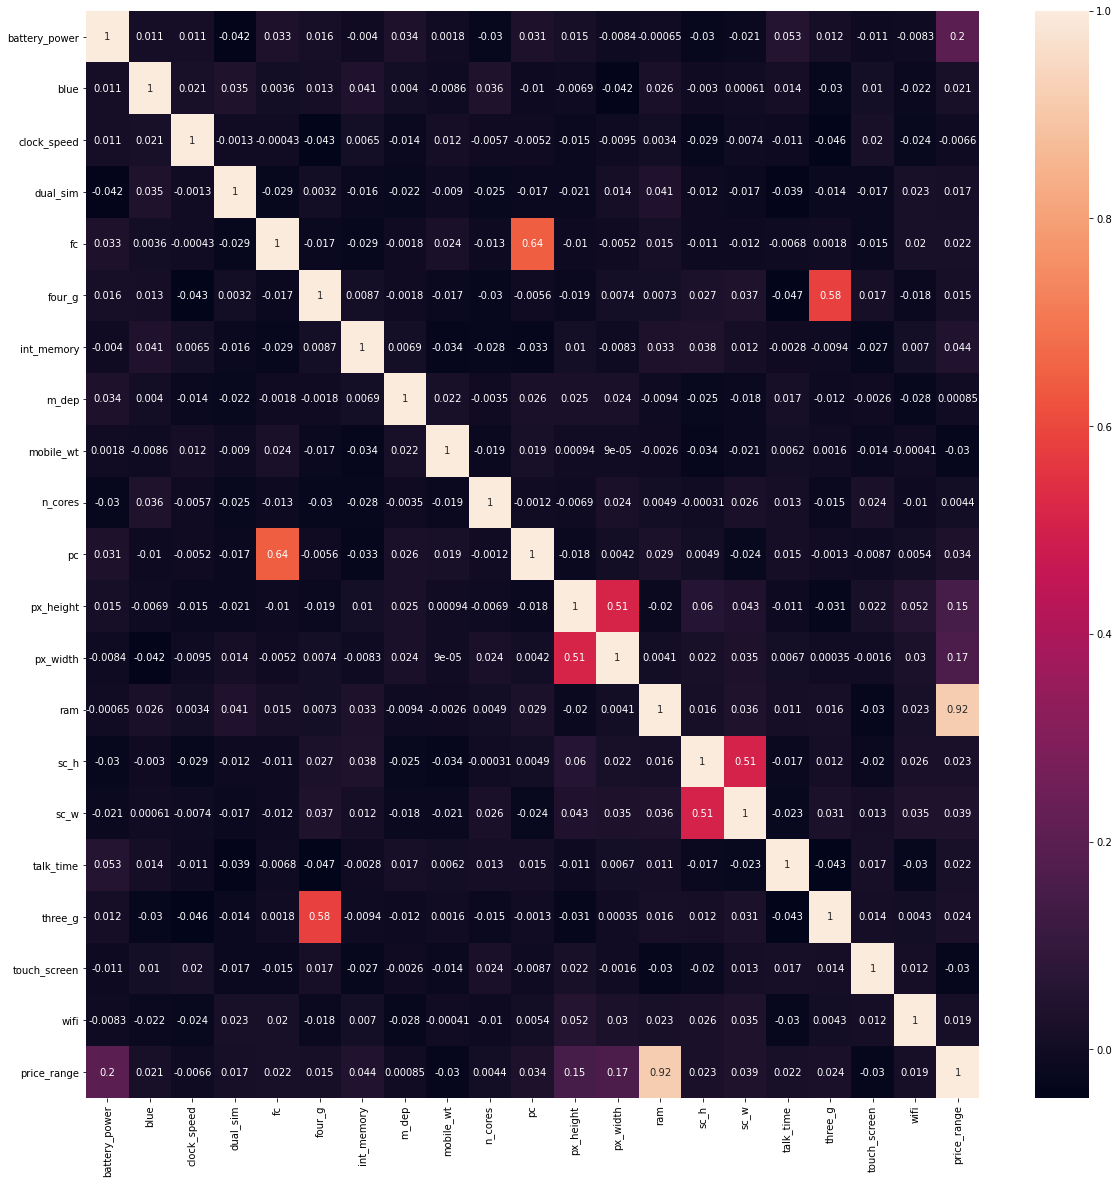

In [20]:
import seaborn as sns
corr=df.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [21]:
#finding and removing correlated feature
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [22]:
correlation(df.iloc[:,:-1],0.5)

{'pc', 'px_width', 'sc_w', 'three_g'}

In [25]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,Y)
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

ram              0.848654
blue             0.031921
battery_power    0.031606
px_width         0.025615
px_height        0.024680
wifi             0.012846
touch_screen     0.012499
sc_w             0.011012
dual_sim         0.006398
int_memory       0.006343
three_g          0.000698
sc_h             0.000000
talk_time        0.000000
pc               0.000000
mobile_wt        0.000000
m_dep            0.000000
four_g           0.000000
fc               0.000000
clock_speed      0.000000
n_cores          0.000000
dtype: float64

In [31]:
3742/72200

0.05182825484764543

In [32]:
5150/74400

0.06922043010752688